# 블로그 검색 결과 크롤링

In [21]:
import os
import sys
import urllib.request
client_id = "3wU5xwXfFVL4LweQzLHQ"
client_secret = "K60NkftSAH"
encText = urllib.parse.quote("칼의노래")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText + "&display=7" # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
blog={}
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
    blog=response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Mon, 27 Dec 2021 12:36:29 +0900",
"total": 27219,
"start": 1,
"display": 7,
"items": [
{
"title": "독후감 쓰기-청소년 권장도서 김훈 역사소설 &lt;<b>칼의 노래</b>&gt;현실... ",
"link": "https:\/\/blog.naver.com\/rlfwk7596?Redirect=Log&logNo=222599537775",
"description": "&lt;<b>칼의 노래</b>&gt; &lt;현의 노래&gt; &lt;남한 산성&gt; 등의 소설 서문과 &lt;공치는 아이들&gt;&lt;밥벌이의 지겨움&gt; &lt;풍경과 상처&gt; 등의 에세이집 서문들 그리고 문학상 수상 소감들이 소개되어 있다. 작가의 필력에 매료되어 이 책들을 다... ",
"bloggername": "아이 북 사랑",
"bloggerlink": "https://blog.naver.com/rlfwk7596",
"postdate": "20211219"

},
{
"title": "[<b>칼의 노래</b>] 읽지 못한 책, 읽어 버린 글",
"link": "https:\/\/blog.naver.com\/tometoyou?Redirect=Log&logNo=222587772968",
"description": "<b>칼의 노래</b> 작가 김훈 출판 문학동네 발매 2012.01.05. 리뷰보기 &lt;읽었던 그때 그 순간의 감정과 느낌&gt; <b>칼의 노래</b> (김훈/문학동네) - 20년 7월 완독 글에 놀랐다. 김훈이라는 작가에 대해서는 전부터 너무도 많이... ",
"bloggername": "하얀 바탕에 검은 글자를 채우는 새벽",
"bloggerlink": "https://blog.naver.com/tometoyou",
"postdate": "20211206"

},
{
"title": "9월 첫 번째 후기, 지정도서 <b>칼의 노래</b> - 김훈",
"l

# 불필요한 문자&태그 삭제 

In [156]:
blog=blog.replace("\n","")
blog=blog.replace("\\","")
blog=blog.replace("</b>","")
blog=blog.replace("<b>","")
blog=blog.replace("&lt;","")
blog=blog.replace("&gt;","")
blog=blog.replace("&quot;","")
blog=blog.replace("?Redirect=Log&logNo=","/")

# 블로그정보 데이터프레임

In [210]:
import json
from bs4 import BeautifulSoup as bs
import pandas as pd
from urllib.request import urlretrieve

In [158]:
blog_list=json.loads(blog)

In [159]:
blog_table=pd.DataFrame(blog_list['items'],columns=['title','link','bloggername','bloggerlink','description'])

In [160]:
blog_table

,title,link,bloggername,bloggerlink,description
0,독후감 쓰기-청소년 권장도서 김훈 역사소설 칼의 노래현실...,https://blog.naver.com/rlfwk7596/222599537775,아이 북 사랑,https://blog.naver.com/rlfwk7596,칼의 노래 현의 노래 남한 산성 등의 소설 서문과 공치는 아이들밥벌이의 지겨움 풍경...
1,"[칼의 노래] 읽지 못한 책, 읽어 버린 글",https://blog.naver.com/tometoyou/222587772968,하얀 바탕에 검은 글자를 채우는 새벽,https://blog.naver.com/tometoyou,칼의 노래 작가 김훈 출판 문학동네 발매 2012.01.05. 리뷰보기 읽었던 그때...
2,"9월 첫 번째 후기, 지정도서 칼의 노래 - 김훈",https://blog.naver.com/kissing009/222087508706,"한계를 그어놓으면, 결국 그렇게 되고 만다",https://blog.naver.com/kissing009,칼의 노래 저자 김훈 출판 문학동네 발매 2012.01.05. 나에게 이 책은? 9...
3,칼의노래 김훈 이순신 장군을 기억하며,https://blog.naver.com/choiceagg/222007059967,둥이부부의 세계여행,https://blog.naver.com/choiceagg,이순신을 기억하며 읽는 칼의노래 저희는 이번 남해 여행을 통해서 이순신 장구님의 흔...
4,서평 :: 칼의 노래 - 김훈,https://blog.naver.com/cyberkimsol/222252548807,솔세무사 웰니스블로그 ·ᴗ·,https://blog.naver.com/cyberkimsol,서평 :: 칼의노래 - 김훈 칼의 노래 저자 김훈 출판 생각의나무 발매 2001.1...
5,중소기업 가지마라 22[칼의 노래_김훈],https://blog.naver.com/findpoint/222362458298,becoming wiser,https://blog.naver.com/findpoint,칼의 노래_ 김훈 정말로 오래 되었다. 이 칼의 노래 책을 읽은 지... 당시 김훈...
6,"칼의 노래 (김훈) 독후감, 해석",https://blog.naver.com/nayoung622/222202256657,바라기,https://blog.naver.com/nayoung622,칼의 노래 (김훈) 30402 김나영 조사 문제: 이순신의 영웅화에 대하여 조사해보...


In [20]:
blog_table.to_excel('blog2.xlsx')

# 블로그 이미지 크롤링 

In [28]:
from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys

In [29]:
driver=wb.Chrome()
url="https://section.blog.naver.com/Search/Post.naver?pageNo=1&rangeType=ALL&orderBy=sim&keyword="+encText
driver.get(url)

In [162]:
blog_table.link[0]

'https://blog.naver.com/rlfwk7596/222599537775'

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36" lang="ko"><head><script async="" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js" type="text/javascript"></script><style type="text/css">@charset "UTF-8";[ng\:cloak],[ng-cloak],[data-ng-cloak],[x-ng-cloak],.ng-cloak,.x-ng-cloak,.ng-hide:not(.ng-hide-animate){display:none !important;}ng\:form{display:block;}.ng-animate-shim{visibility:hidden;}.ng-anchor{position:absolute;}</style>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<base href="/home"/>
<meta content="noindex,nofollow" name="robots"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://section.blog.naver.com/favicon.ico?3" rel="shortcut icon" type="image/x-icon"/>
<meta content="칼의노래 : 네이버 블로그" property="og:title"/>
<meta content="https://blogimgs.pstatic.net/nblog/mylog/post/og_default_image_160610.png
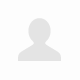
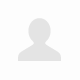

In [32]:
soup=bs(driver.page_source, 'lxml')
soup

In [143]:
img=soup.select("div.thumbnail_area")

In [144]:
print(img)

[<div bg-sliding-leave="" class="thumbnail_area">
<!-- ngRepeat: thumbnail in thumbnailList | limitTo : 1 --><a bg-nclickf='{"code":"srs*l.image"}' class="thumbnail_inner" href="https://blog.naver.com/rlfwk7596/222599537775" ng-click="afterProcess()" ng-href="https://blog.naver.com/rlfwk7596/222599537775" ng-repeat="thumbnail in thumbnailList | limitTo : 1" target="_blank">
<img alt="포스트 썸네일" bg-image="https://blogthumb.pstatic.net/MjAyMTEyMTlfMTU3/MDAxNjM5OTIyNzQ4NjIw.DuFtaVCwvBEln4cznibUykU_kD8QsUAr032ZY5wAlOgg.WdHBiB_NZWqw4_aG-Vy3YaHYccyYapRtRSiEQYSnYr8g.JPEG.rlfwk7596/KakaoTalk_20211219_225020448.jpg?type=s2" class="img_post" height="167" ng-class="{background_color:thumbnail['noThisDayThumbnail']}" ng-hide="thumbnail['noThisDayThumbnail']" src="https://blogthumb.pstatic.net/MjAyMTEyMTlfMTU3/MDAxNjM5OTIyNzQ4NjIw.DuFtaVCwvBEln4cznibUykU_kD8QsUAr032ZY5wAlOgg.WdHBiB_NZWqw4_aG-Vy3YaHYccyYapRtRSiEQYSnYr8g.JPEG.rlfwk7596/KakaoTalk_20211219_225020448.jpg?type=s2" width="167"/>
<!-- [D] 36

In [200]:
print(img[0].a['href'])

https://blog.naver.com/rlfwk7596/222599537775


In [201]:
print(img[0].img['src'])

https://blogthumb.pstatic.net/MjAyMTEyMTlfMTU3/MDAxNjM5OTIyNzQ4NjIw.DuFtaVCwvBEln4cznibUykU_kD8QsUAr032ZY5wAlOgg.WdHBiB_NZWqw4_aG-Vy3YaHYccyYapRtRSiEQYSnYr8g.JPEG.rlfwk7596/KakaoTalk_20211219_225020448.jpg?type=s2


In [202]:
img_src=[]

In [203]:
len(img)

7

In [197]:
# 이미지 파일 저장 수식 테스트
if blog_table.link[0]==img[0].a['href']:
    img_src=img[0].img['src']
elif blog_table.link[i]!=img[0].a['href']:
    img_src=img[0].img['src']

In [ ]:
# 이미지 파일 저장

In [204]:
for i in range(len(img)):
    if blog_table.link[i]==img[i].a['href']:
        img_src.append(img[i].img['src'])
    else:
        img_src.append('')

# 이미지 파일 저장

In [205]:
img_src

['https://blogthumb.pstatic.net/MjAyMTEyMTlfMTU3/MDAxNjM5OTIyNzQ4NjIw.DuFtaVCwvBEln4cznibUykU_kD8QsUAr032ZY5wAlOgg.WdHBiB_NZWqw4_aG-Vy3YaHYccyYapRtRSiEQYSnYr8g.JPEG.rlfwk7596/KakaoTalk_20211219_225020448.jpg?type=s2',
 'https://blogthumb.pstatic.net/MjAyMTEyMDZfMTk0/MDAxNjM4NzM3OTExNDUy.9OqsfLEkhGTa_TPORlisXftZWMRZ3blQ3RrhkW20e7sg.qmS5GujK3fDYBkG4znxiL7E5rk_BTieVlY5EpTZhPJMg.JPEG.tometoyou/IMG_8612.jpg?type=s2',
 '',
 'https://blogthumb.pstatic.net/MjAyMDA2MjBfNTEg/MDAxNTkyNjQ1OTg5NjU3.X0xdz6UdOaP9N_N7lH131CMViZhrnVHZWwg3RA8ed9Qg.EWGmsLG3NbF2lF2HQ2TFHlP12AXK2s6ZwZGhfBWptC4g.JPEG.choiceagg/IMG_8149.JPG?type=s2',
 'https://blogthumb.pstatic.net/MjAyMTAyMjFfMTU3/MDAxNjEzOTA2ODE5MTc5.GW0hrxRNf-N026LwhjhEKDhHwMdfI_OWK5Nd9zw81Ywg.i5KzQq0vlwCcCLyDknWizA1guY5GyJ3z_jtFtwGXB68g.JPEG.cyberkimsol/PicsArt%A3%DF02%A3%AD08%A3%AD06.29.51.jpg?type=s2',
 '',
 '']

In [207]:
len(img_src)

7

In [212]:
for i in range(len(img_src)):
    print(i+1)
    print(img_src[i])

1
https://blogthumb.pstatic.net/MjAyMTEyMTlfMTU3/MDAxNjM5OTIyNzQ4NjIw.DuFtaVCwvBEln4cznibUykU_kD8QsUAr032ZY5wAlOgg.WdHBiB_NZWqw4_aG-Vy3YaHYccyYapRtRSiEQYSnYr8g.JPEG.rlfwk7596/KakaoTalk_20211219_225020448.jpg?type=s2
2
https://blogthumb.pstatic.net/MjAyMTEyMDZfMTk0/MDAxNjM4NzM3OTExNDUy.9OqsfLEkhGTa_TPORlisXftZWMRZ3blQ3RrhkW20e7sg.qmS5GujK3fDYBkG4znxiL7E5rk_BTieVlY5EpTZhPJMg.JPEG.tometoyou/IMG_8612.jpg?type=s2
3

4
https://blogthumb.pstatic.net/MjAyMDA2MjBfNTEg/MDAxNTkyNjQ1OTg5NjU3.X0xdz6UdOaP9N_N7lH131CMViZhrnVHZWwg3RA8ed9Qg.EWGmsLG3NbF2lF2HQ2TFHlP12AXK2s6ZwZGhfBWptC4g.JPEG.choiceagg/IMG_8149.JPG?type=s2
5
https://blogthumb.pstatic.net/MjAyMTAyMjFfMTU3/MDAxNjEzOTA2ODE5MTc5.GW0hrxRNf-N026LwhjhEKDhHwMdfI_OWK5Nd9zw81Ywg.i5KzQq0vlwCcCLyDknWizA1guY5GyJ3z_jtFtwGXB68g.JPEG.cyberkimsol/PicsArt%A3%DF02%A3%AD08%A3%AD06.29.51.jpg?type=s2
6

7

